# Deteccion de Fraude Machine Learning

**Importamos los paquetes necesarios**

In [1]:
import os
import zipfile
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#import statsmodels.api as sm

from scipy.stats import chi2_contingency
from scipy.stats import f_oneway
from scipy import stats

**Importamos los datos**

In [2]:
INPUT_ZIP = "../data/in/Fraud_Detction_Dataset.zip"  # Directorio del zip
OUTPUT_FOLDER = "../data/out/"  # Directorio de destino
TRAIN_FILENAME = "creditcard.csv"  # Nombre del fichero de entrenamiento

def fetch_data(input_path=INPUT_ZIP, output_dir=OUTPUT_FOLDER):
    
    # Comprobación de que el directorio de destino existe
    os.makedirs(output_dir, exist_ok=True)

    # Descomprime el archivo ZIP en caso de que no haya ningún csv en la carpeta
    if(len([file for file in os.listdir(output_dir) if file.endswith('.csv')]) == 0):
        with zipfile.ZipFile(input_path, 'r') as zip_ref:
            zip_ref.extractall(output_dir)


def load_data(directory=OUTPUT_FOLDER, filename=TRAIN_FILENAME):

    # Construir la ruta completa al archivo CSV
    file_path = os.path.join(directory, filename)

    # Verificar si el archivo existe
    if not os.path.exists(file_path):
        raise FileNotFoundError(f"El archivo {filename} no se encuentra en el directorio {directory}")

    # Leer el archivo CSV en un DataFrame
    return pd.read_csv(file_path)

fetch_data()
df = load_data()
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.shape

(284807, 31)

In [5]:
df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [3]:
df['Class'] = df['Class'].astype('object')

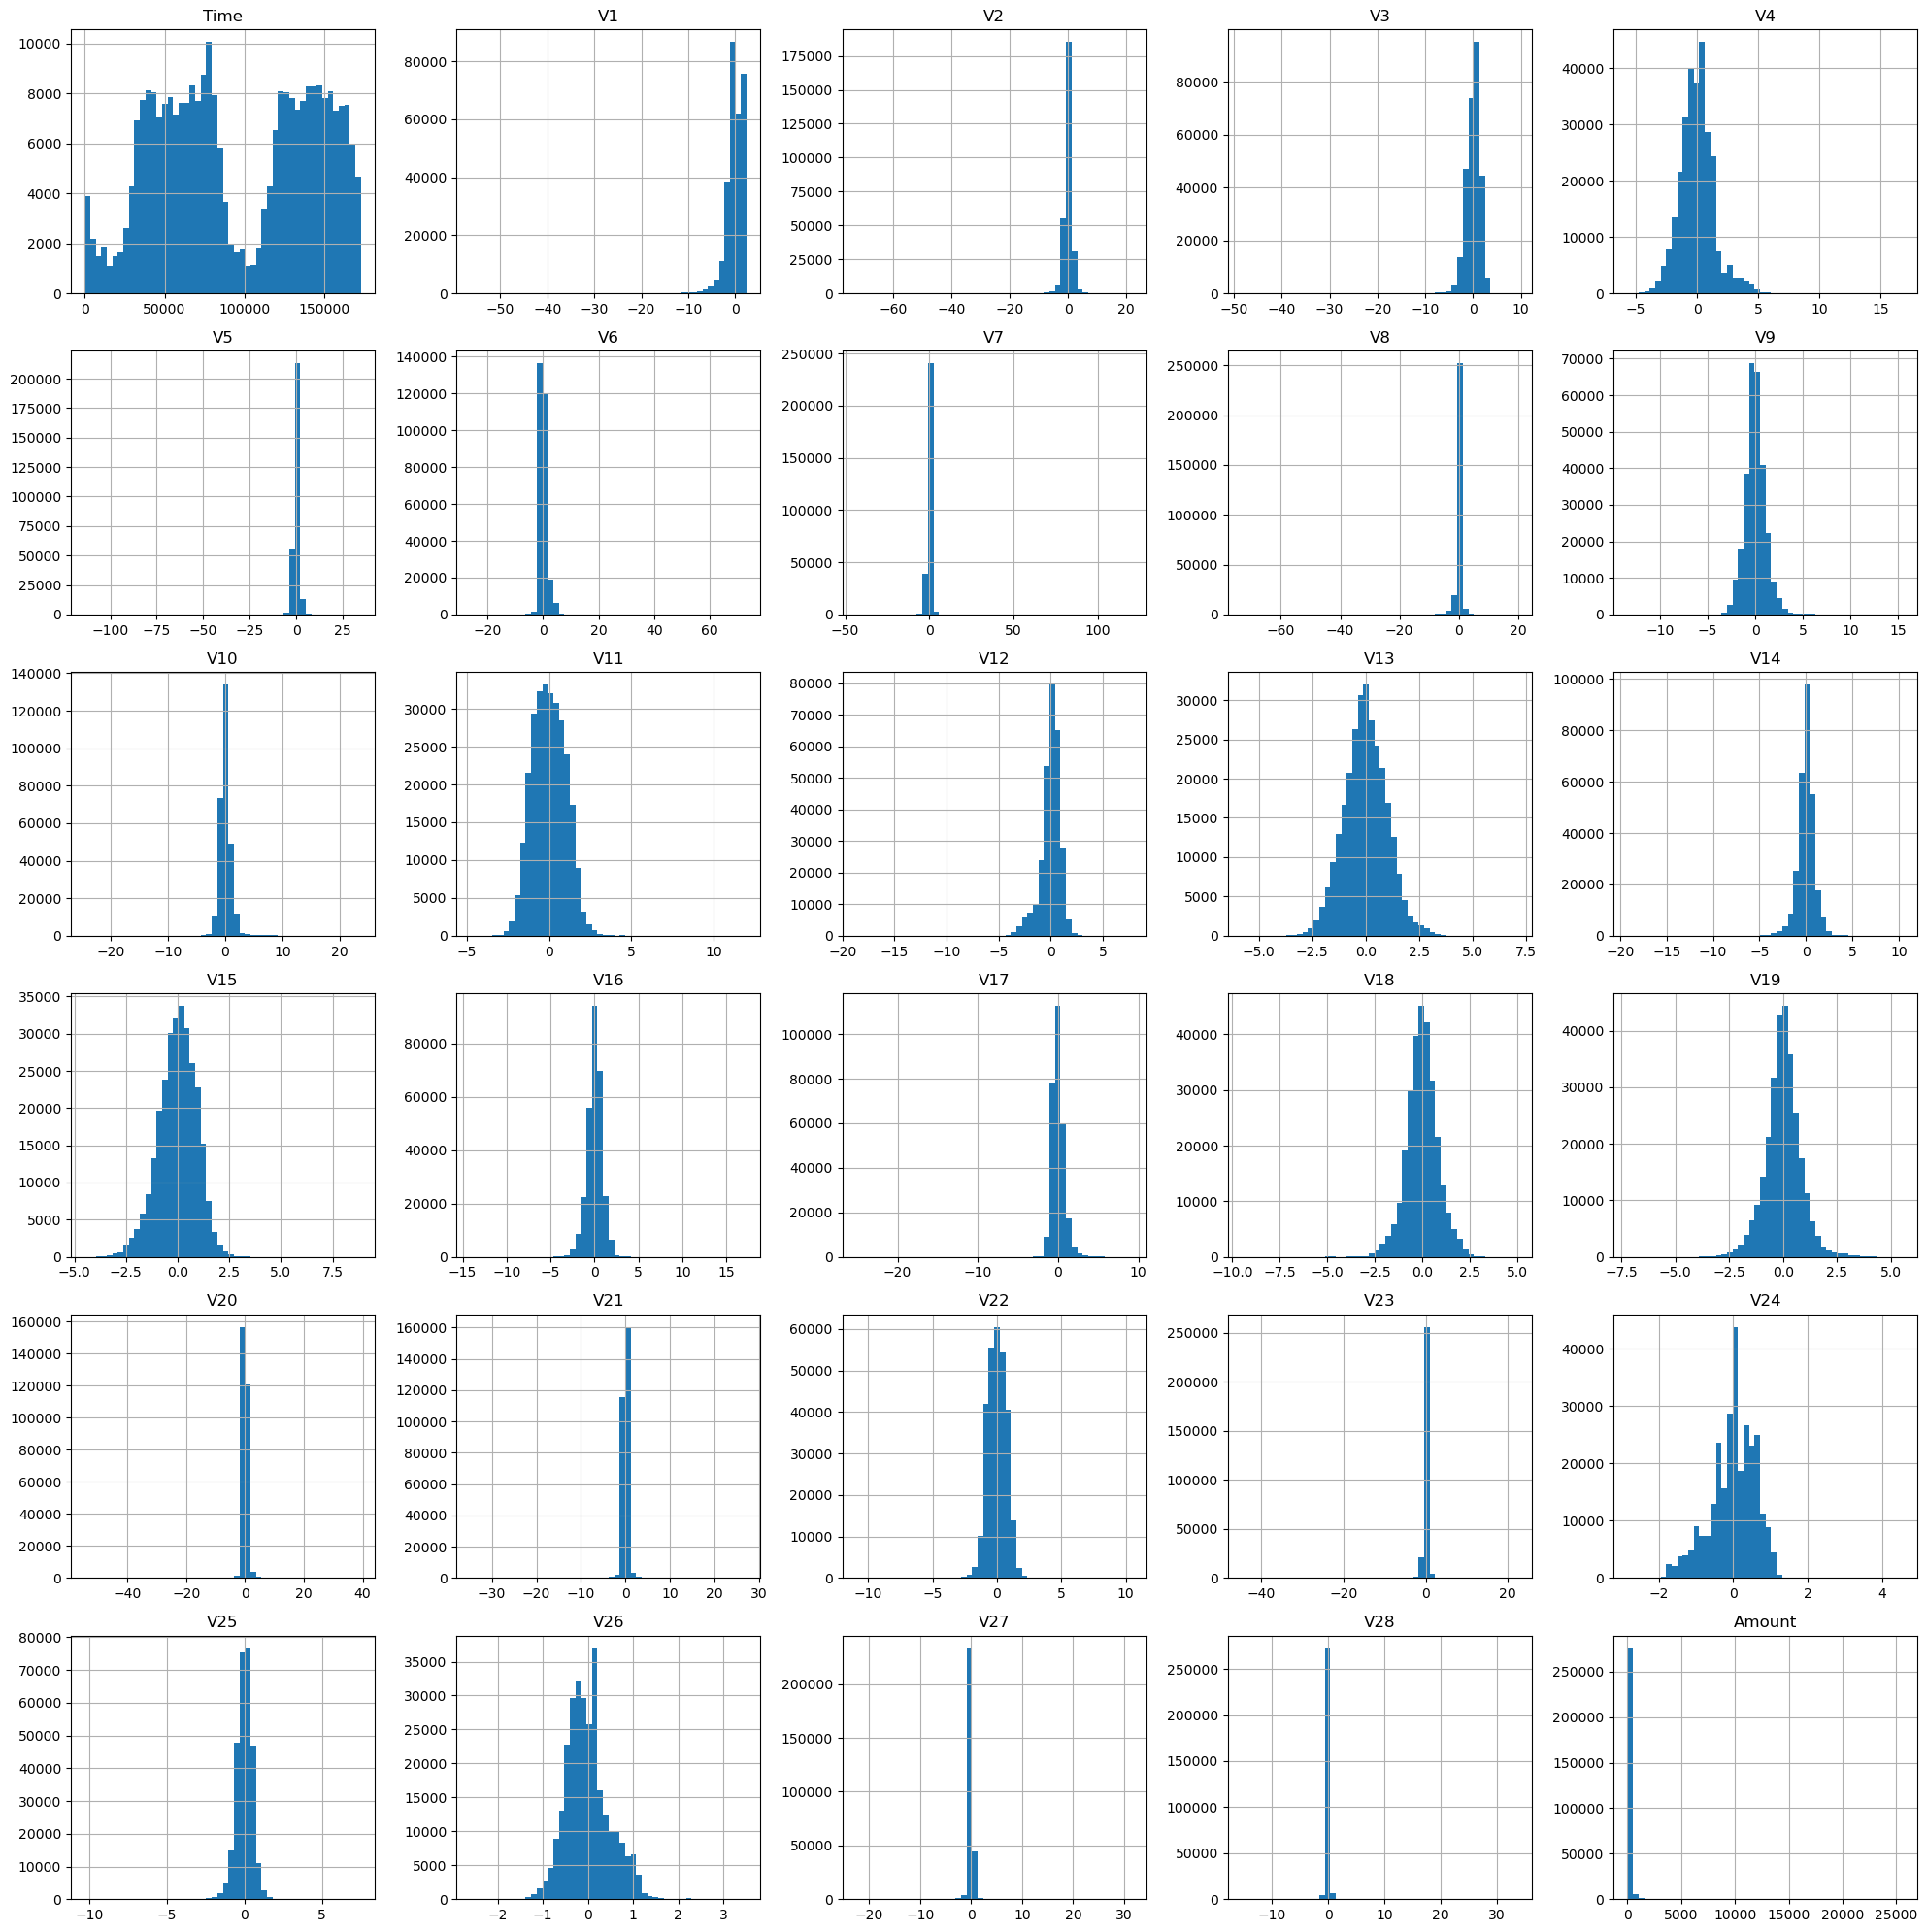

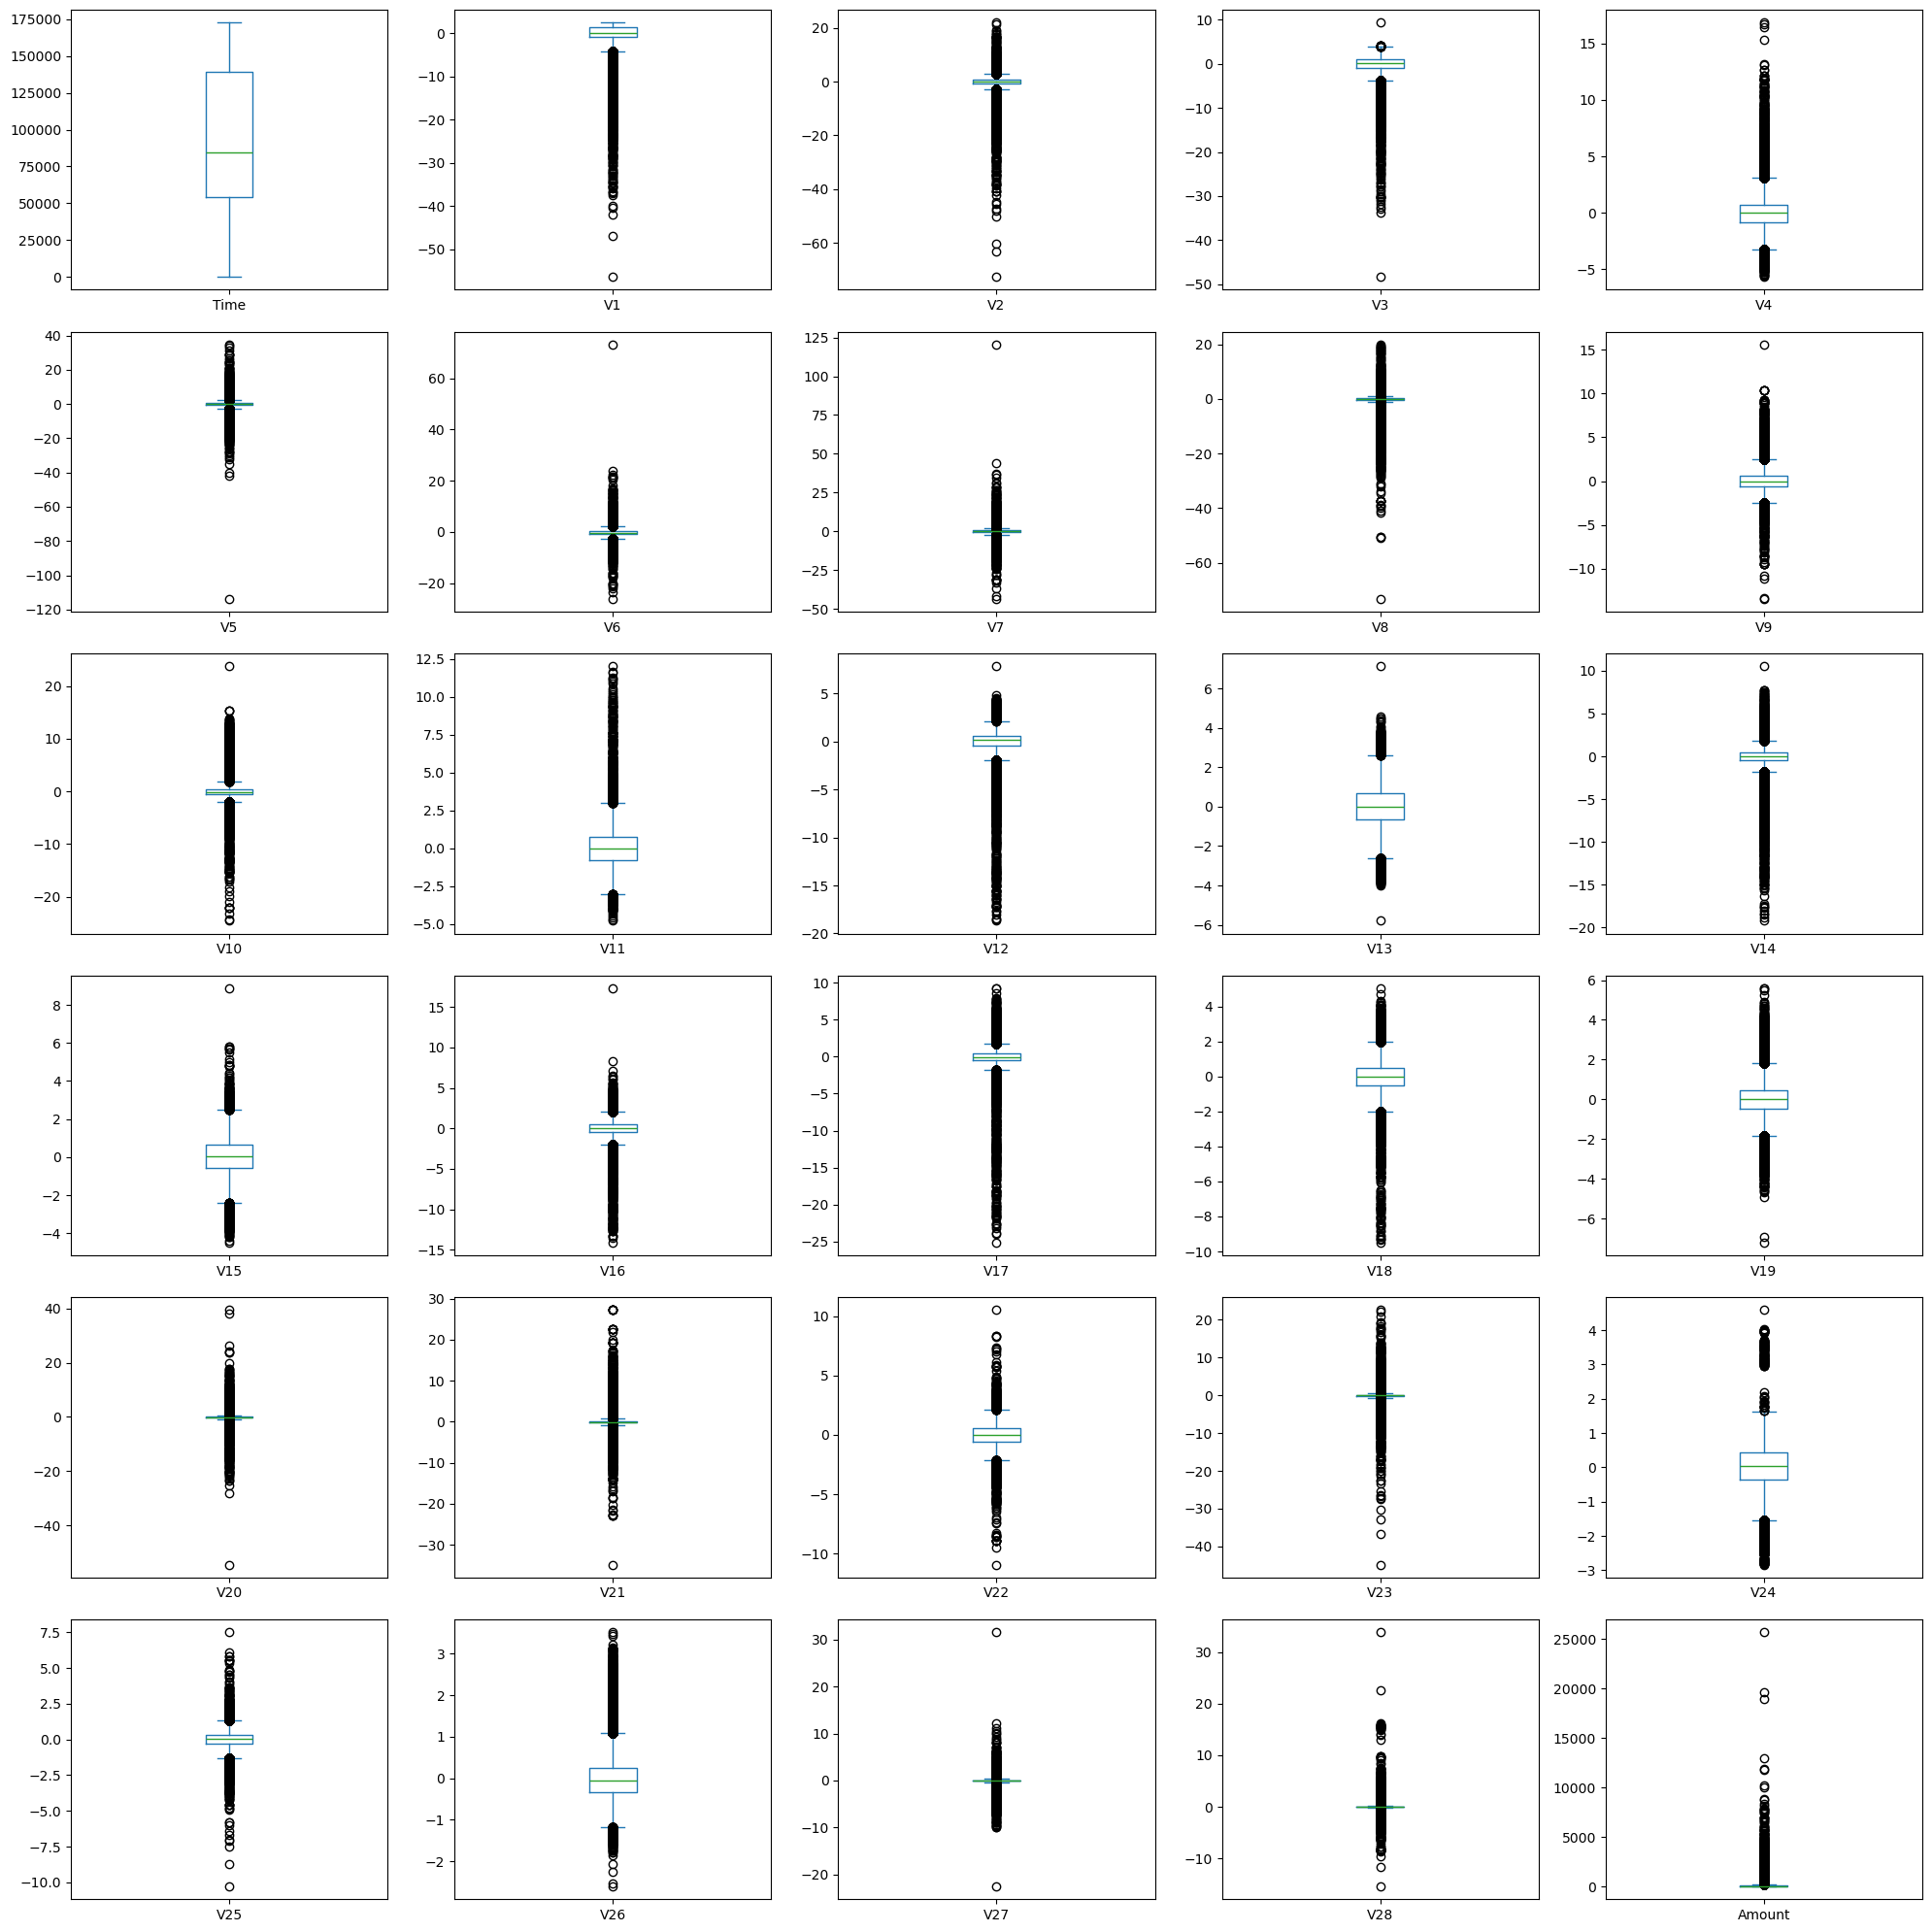

In [8]:
def graficos(df):
    df.hist(figsize=(20, 20), bins=50)
    plt.tight_layout()
    plt.show()

    # Crear boxplots para todas las columnas numéricas
    df.select_dtypes(include=['float64']).plot(kind='box', subplots=True, layout=(6, 5), figsize=(20, 20), sharex=False, sharey=False)
    plt.tight_layout()
    plt.show()
graficos(df)

In [ ]:
# Filtrar los datos eliminando los valores atípicos excepto para 'Class' igual a 1

Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
df_cleaned = df[
    (df['Class'] == 1) | 
    ~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)
]

# Mostrar el nuevo DataFrame sin valores atípicos
df_cleaned

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284796,172780.0,1.884849,-0.143540,-0.999943,1.506772,-0.035300,-0.613638,0.190241,-0.249058,0.666458,...,0.144008,0.634646,-0.042114,-0.053206,0.316403,-0.461441,0.018265,-0.041068,60.00,0
284797,172782.0,-0.241923,0.712247,0.399806,-0.463406,0.244531,-1.343668,0.929369,-0.206210,0.106234,...,-0.228876,-0.514376,0.279598,0.371441,-0.559238,0.113144,0.131507,0.081265,5.49,0
284800,172784.0,2.039560,-0.175233,-1.196825,0.234580,-0.008713,-0.726571,0.017050,-0.118228,0.435402,...,-0.268048,-0.717211,0.297930,-0.359769,-0.315610,0.201114,-0.080826,-0.075071,2.68,0
284801,172785.0,0.120316,0.931005,-0.546012,-0.745097,1.130314,-0.235973,0.812722,0.115093,-0.204064,...,-0.314205,-0.808520,0.050343,0.102800,-0.435870,0.124079,0.217940,0.068803,2.69,0


In [10]:
# # Calcular los rangos intercuartílicos (IQR)
# Q1 = df.quantile(0.25)
# Q3 = df.quantile(0.75)
# IQR = Q3 - Q1

# # Filtrar los datos eliminando los valores atípicos
# if df['Class'] is not 1:
#     df_cleaned = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

# # Mostrar el nuevo DataFrame sin valores atípicos
# df_cleaned

In [11]:
print(f'Dataset Original {df.shape}')
print(f'Dataset sin Outliers {df_cleaned.shape}')

Dataset Original (284807, 31)
Dataset sin Outliers (146811, 31)


In [12]:
df['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [13]:
df_cleaned['Class'].value_counts()

Class
0    146319
1       492
Name: count, dtype: int64

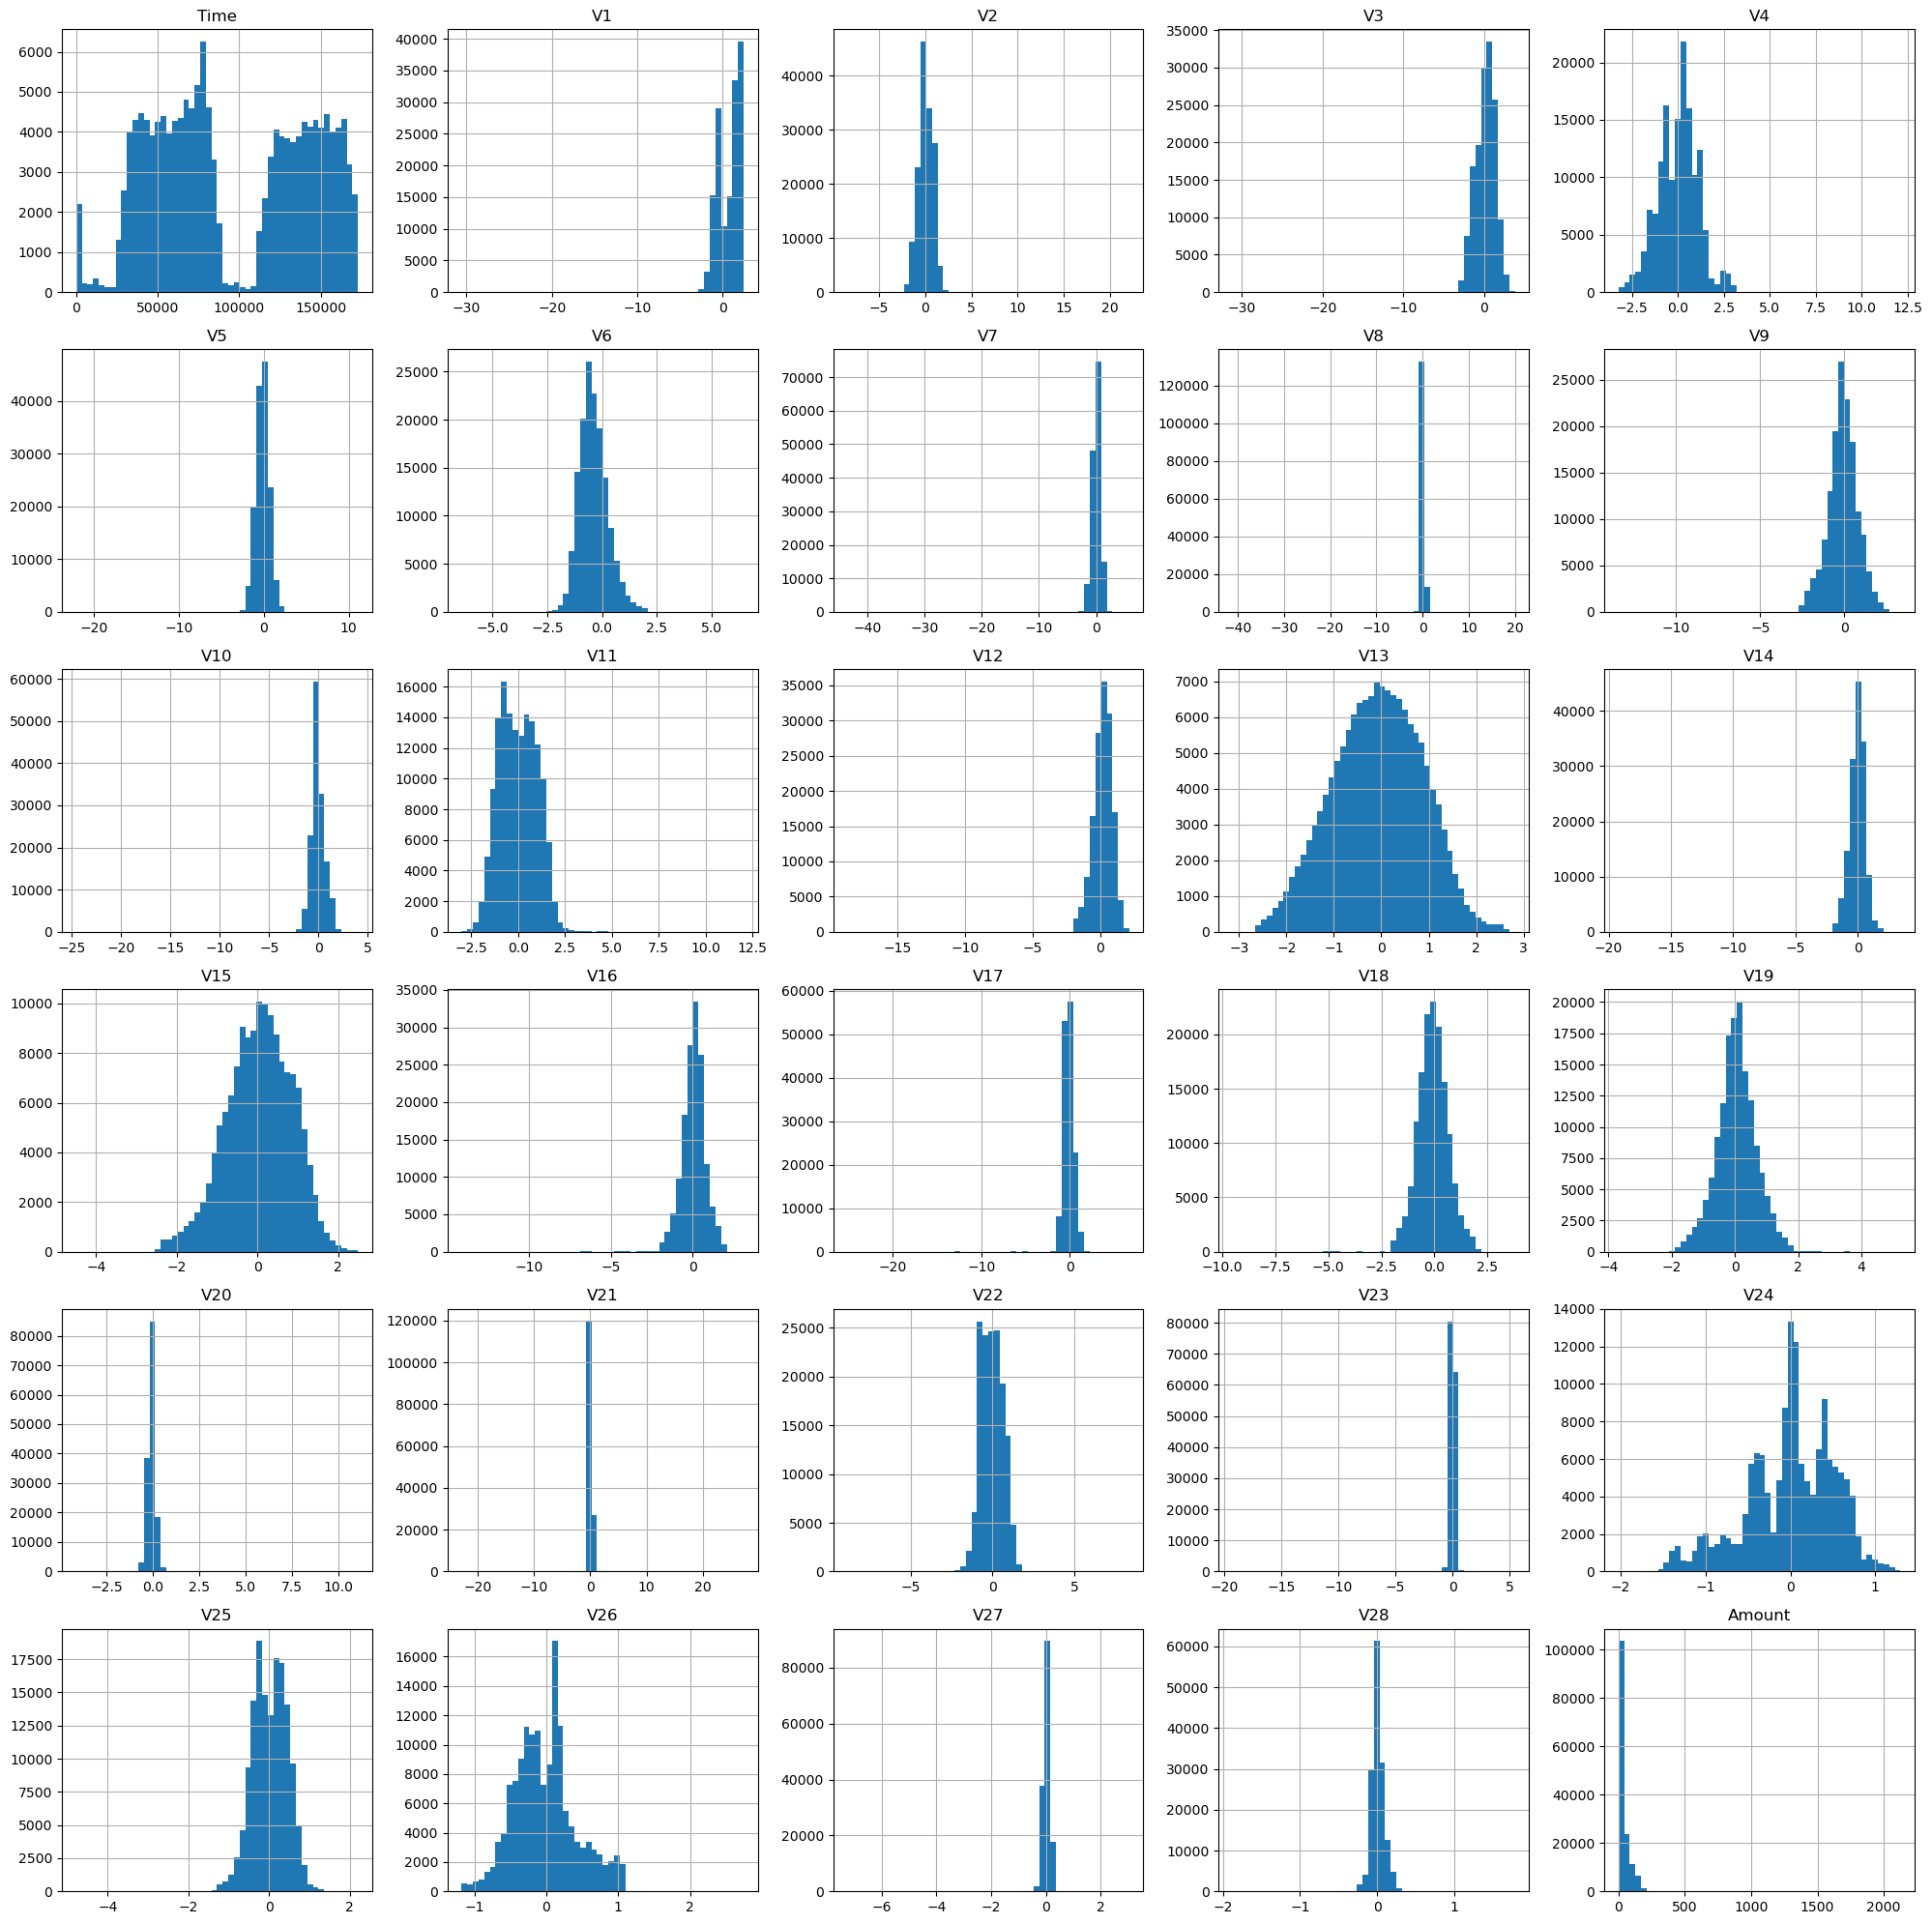

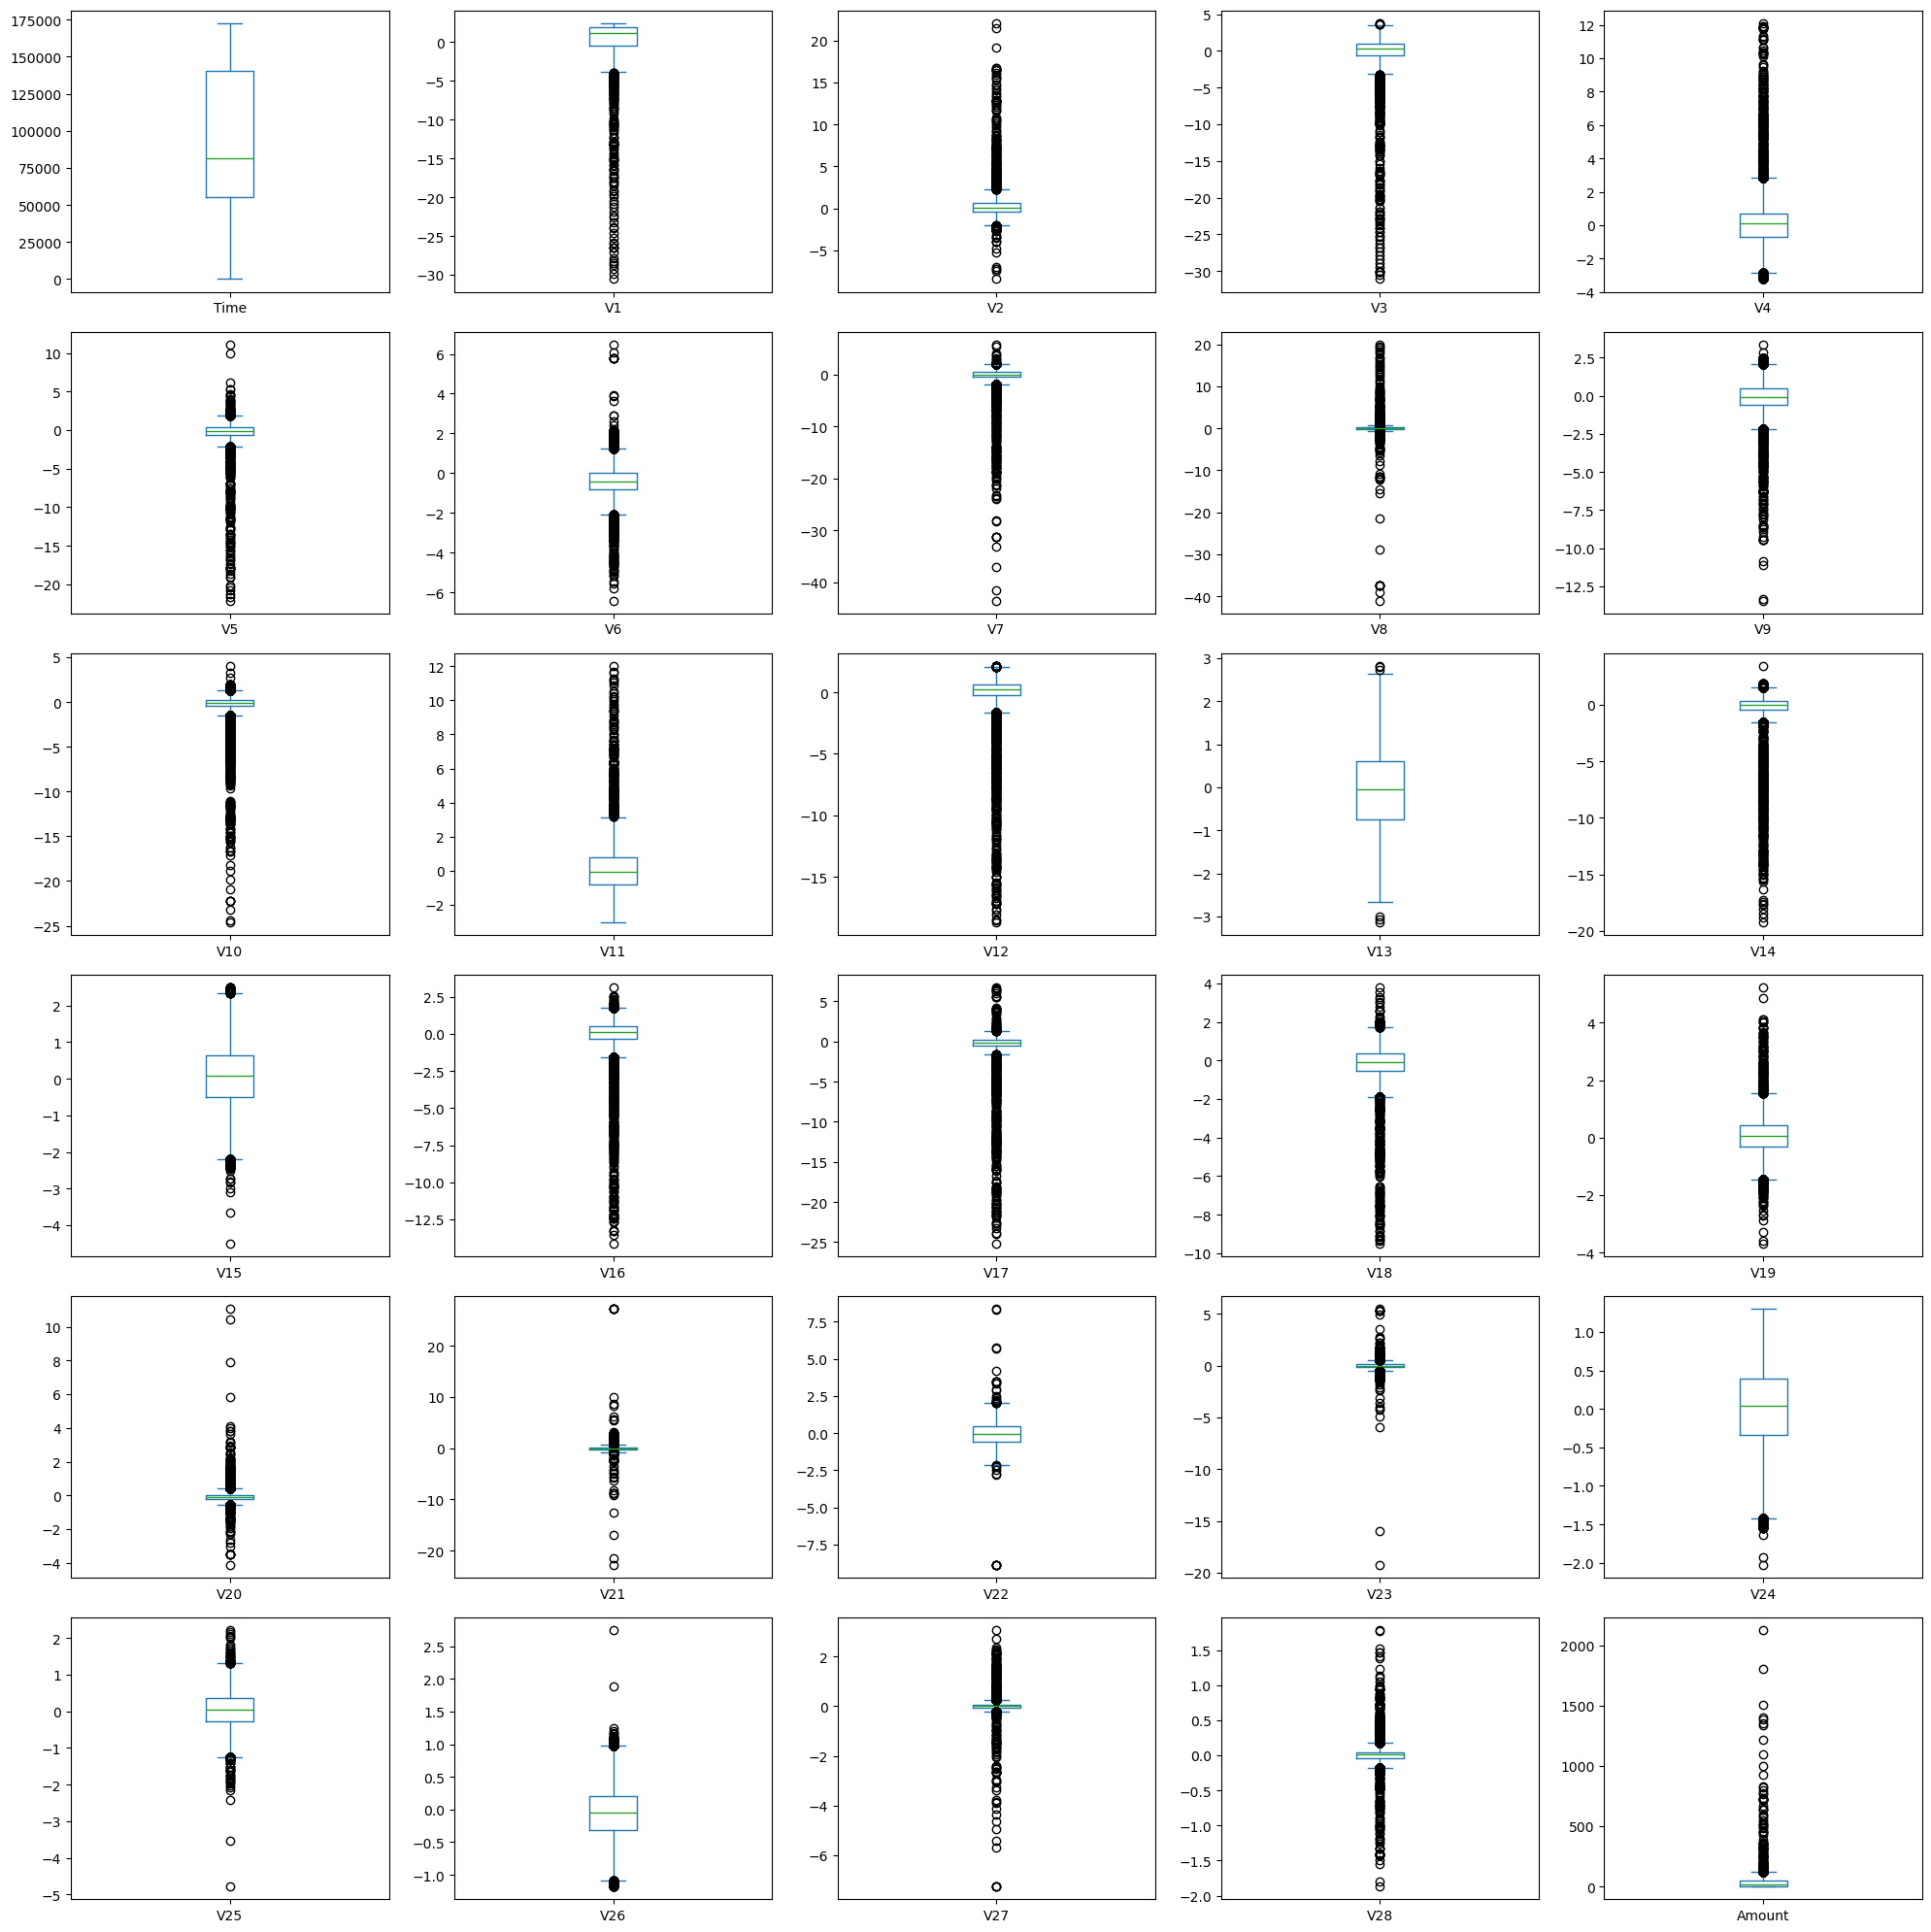

In [14]:
graficos(df_cleaned)

In [5]:
# Calcular la asimetría (skew) para las columnas numéricas
skew_values = df_cleaned.select_dtypes(include=['float64','float']).skew().sort_values(ascending= False)
print(skew_values)

V21       17.100646
Amount     4.329037
V20        3.054366
V2         1.900414
V11        0.482432
V6         0.451770
V4         0.444943
V26        0.327441
Time       0.040953
V22        0.027846
V19       -0.006479
V28       -0.050497
V13       -0.083582
V25       -0.143694
V15       -0.259982
V9        -0.426478
V24       -0.549835
V18       -0.566446
V16       -2.377156
V1        -2.565851
V5        -2.729233
V3        -3.063874
V10       -4.434151
V12       -4.665763
V14       -5.590669
V27       -6.249142
V23       -7.308582
V7        -9.097056
V17       -9.864922
V8       -21.458855
dtype: float64


In [6]:
# Filtrar las filas donde Class es igual a 1
df_class_1 = df[df['Class'] == 1]

# Calcular los outliers para cada columna
outliers_count = ((df_class_1 < (Q1 - 1.5 * IQR)) | (df_class_1 > (Q3 + 1.5 * IQR))).sum()

# Mostrar el número de outliers por columna
print(outliers_count)

Time        0
V1        174
V2        246
V3        312
V4        318
V5        208
V6        137
V7        301
V8        247
V9        223
V10       399
V11       294
V12       409
V13         8
V14       430
V15        12
V16       351
V17       397
V18       237
V19       135
V20       194
V21       244
V22        28
V23       149
V24         3
V25        55
V26        10
V27       344
V28       272
Amount     91
Class     492
dtype: int64


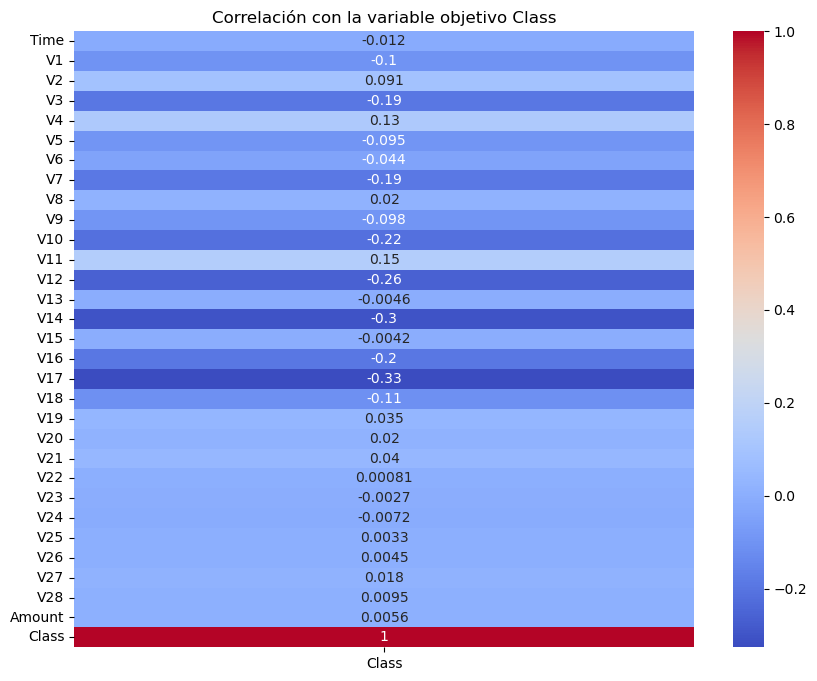

In [17]:
# Crear una matriz de correlación para las columnas numéricas
correlation_matrix = df.corr()

# Filtrar las correlaciones relacionadas con la variable objetivo 'Class'
correlation_with_class = correlation_matrix[['Class']]

# Crear un mapa de calor con seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_with_class, annot=True, cmap='coolwarm', cbar=True)
plt.title('Correlación con la variable objetivo Class')
plt.show()

### Conclusiones sobre las correlaciones

1. **Variables más correlacionadas con la variable objetivo**:
    - Las variables que presentan una mayor correlación con "Class" son `V4`, `V11`, y `V17` (valores negativos) y `V14` y `V12` (valores positivos). 

In [18]:
spearman_correlation = df.corr(method='spearman')
spearman_correlation_with_class = spearman_correlation[['Class']]
spearman_correlation_with_class.style.background_gradient(cmap='coolwarm')
spearman_correlation_with_class_sorted = spearman_correlation_with_class.sort_values(by='Class', ascending=False)
spearman_correlation_with_class_sorted.style.background_gradient(cmap='coolwarm')

ImportError: Missing optional dependency 'Jinja2'. DataFrame.style requires jinja2. Use pip or conda to install Jinja2.

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Escalar los datos para que tengan media 0 y desviación estándar 1
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_cleaned.drop(columns=['Class','Time','Amount']))

# Aplicar PCA para reducir a 5 componentes
pca = PCA(n_components=5)
pca_result = pca.fit_transform(scaled_data)

# Crear un DataFrame con los resultados de la PCA
pca_df = pd.DataFrame(data=pca_result, columns=[f'PC{i+1}' for i in range(5)])
pca_df[['Class','Time','Amount']] = df_cleaned[['Class','Time','Amount']].reset_index(drop=True)

# Mostrar la varianza explicada por cada componente
print(f'Varianza explicada por cada componente: {pca.explained_variance_ratio_}')
print(f'Varianza explicada acumulada: {pca.explained_variance_ratio_.cumsum()}')

pca_df.shape

Varianza explicada por cada componente: [0.11510863 0.09359642 0.07706047 0.06844853 0.06125043]
Varianza explicada acumulada: [0.11510863 0.20870505 0.28576552 0.35421406 0.41546449]


(146811, 8)

In [20]:
df_cleaned.var()

Time      2189579983.933975
V1                 1.669449
V2                 0.678355
V3                 1.727907
V4                  1.23241
V5                 0.709176
V6                 0.423386
V7                 0.739167
V8                 0.250708
V9                 0.789822
V10                0.633956
V11                1.032177
V12                 0.68121
V13                0.891442
V14                 0.58149
V15                0.660201
V16                 0.56391
V17                0.599578
V18                0.531757
V19                0.380133
V20                 0.04284
V21                0.110441
V22                0.444633
V23                0.045884
V24                0.269494
V25                0.180075
V26                0.185166
V27                0.018794
V28                0.007333
Amount          1989.061177
Class               0.00334
dtype: object

In [21]:
pca_df.var()

PC1                3.223064
PC2                2.620718
PC3                2.157708
PC4                1.916572
PC5                1.715024
Class               0.00334
Time      2189579983.933975
Amount          1989.061177
dtype: object

In [22]:
pca_df.corr().style.background_gradient(cmap='coolwarm')

ImportError: Missing optional dependency 'Jinja2'. DataFrame.style requires jinja2. Use pip or conda to install Jinja2.

KeyboardInterrupt: 

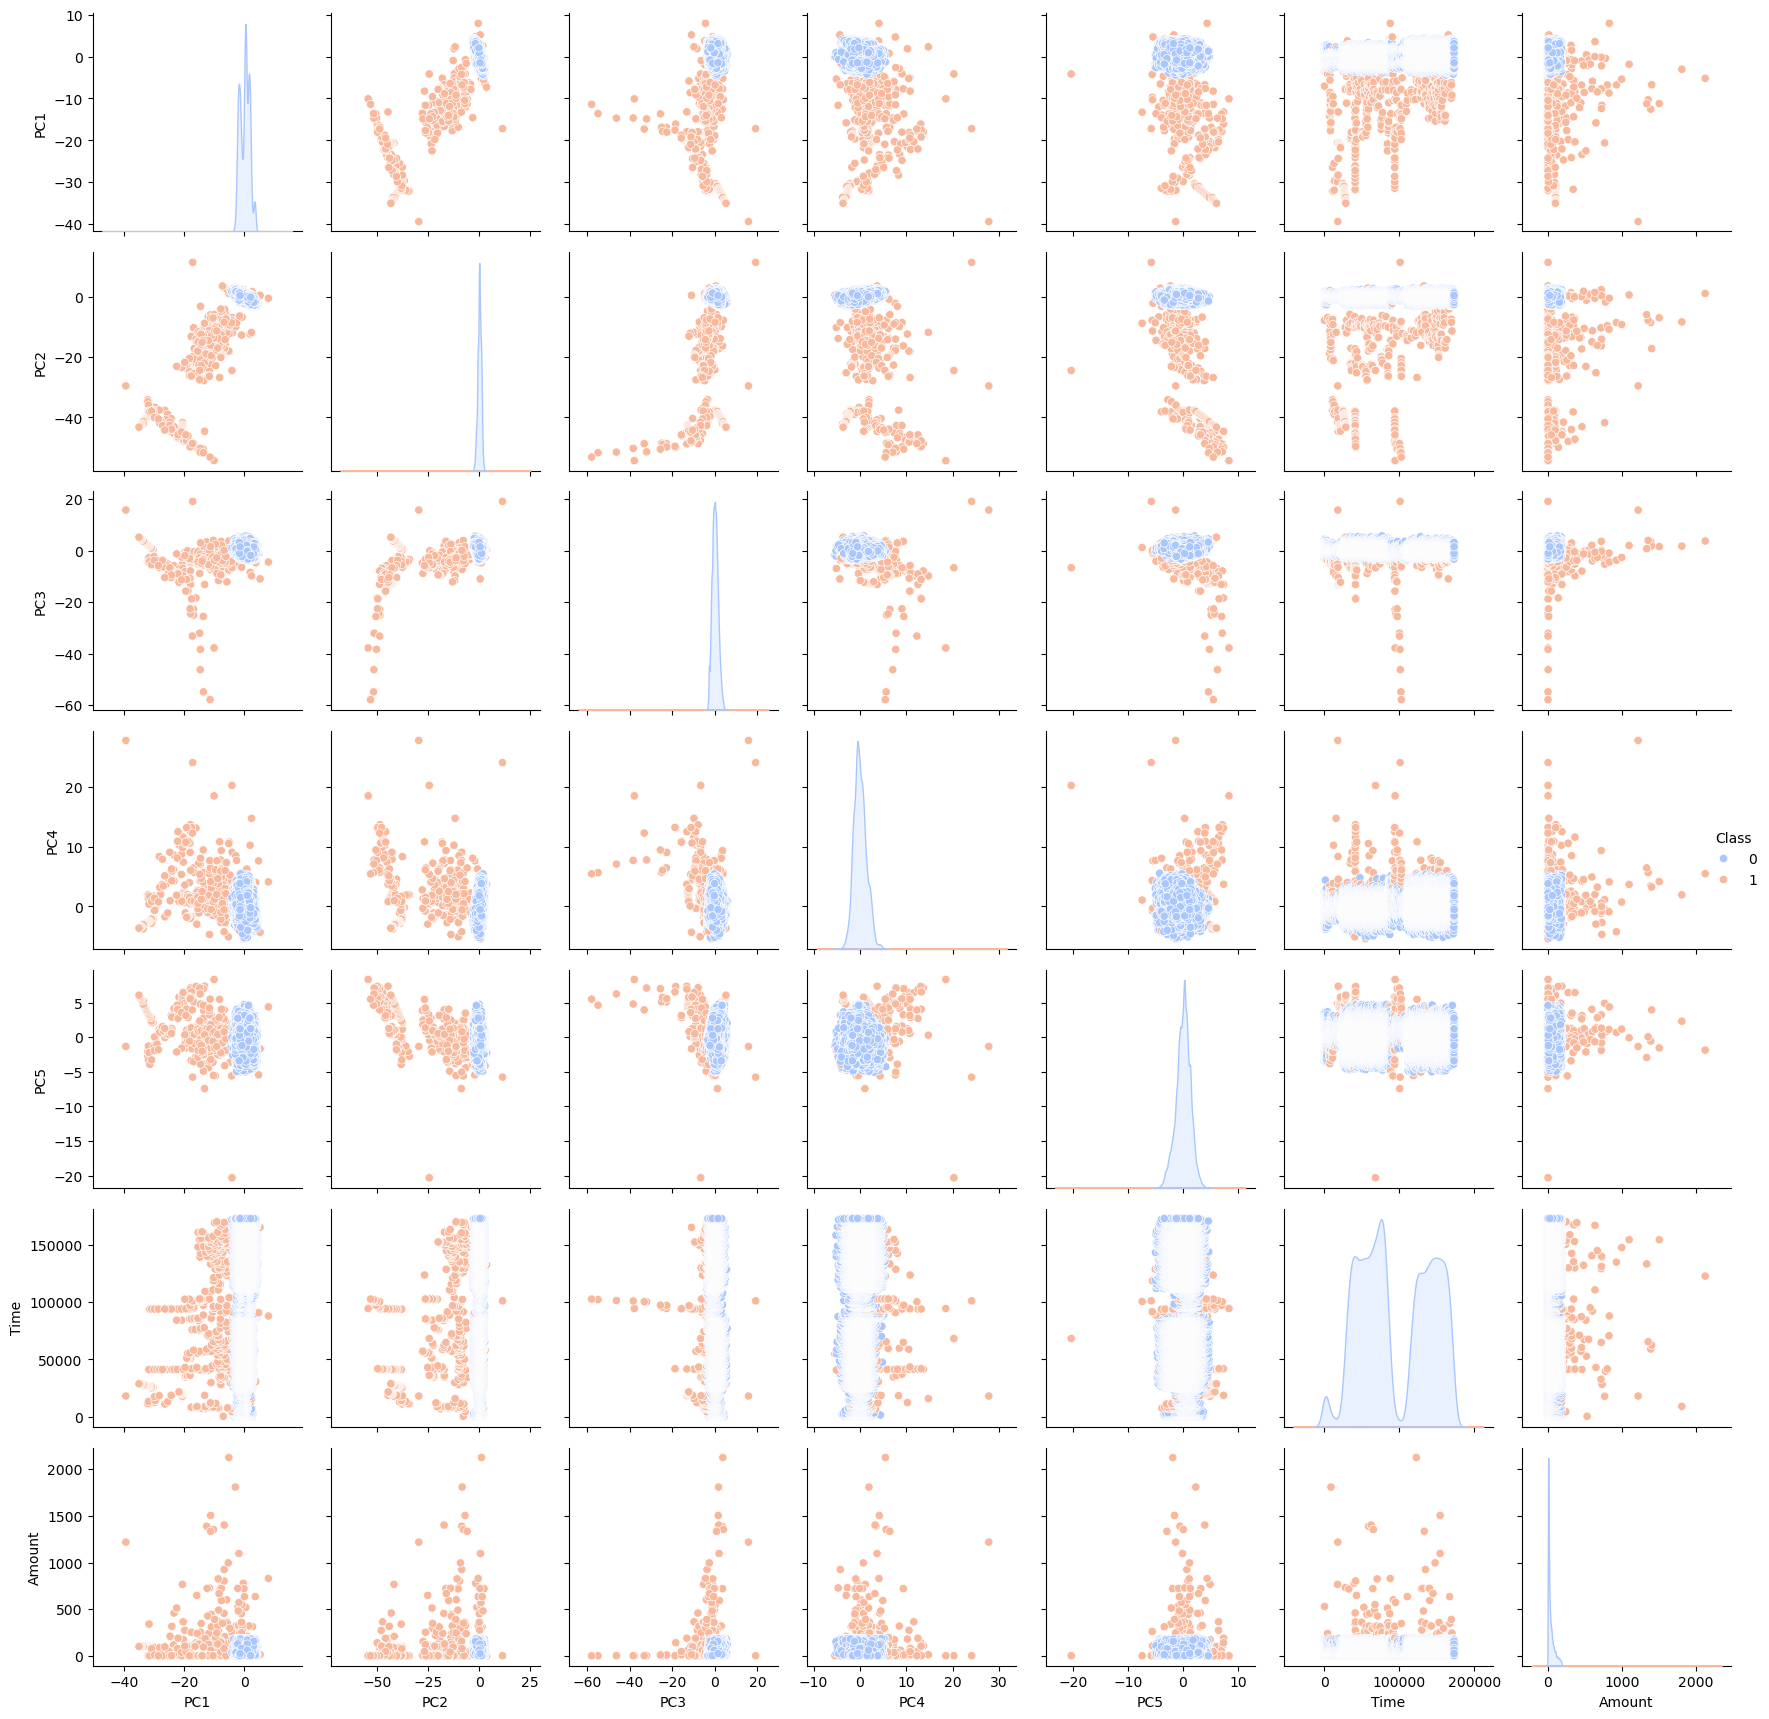

In [23]:
sns.pairplot(pca_df, hue='Class', diag_kind='kde', palette='coolwarm')
plt.show()

### Seleccion de modelos


In [8]:
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, learning_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_auc_score, roc_curve

In [25]:
pca_df.shape

(146811, 8)

In [9]:
X = pca_df.drop('Class', axis=1)
y = pca_df['Class']

In [10]:
y = y.astype(int)
y.unique()

array([0, 1])

In [11]:
y.dtypes

dtype('int64')

In [12]:

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

In [13]:
def classification_metrics(y_test, y_pred, name, model=np.nan, roc_bool=True):
    """
    Calcula y muestra diversas métricas de clasificación tras realizar una predicción.

    Parámetros:
    -----------
    y_test : array-like
        Valores verdaderos de la variable objetivo (labels) del conjunto de test.
    y_pred : array-like
        Valores predichos por el modelo.
    name : str
        Nombre o descripción del modelo, utilizado para etiquetar la salida.
    model : object, optional
        Modelo utilizado para hacer la predicción. Se utiliza para calcular la métrica
        ROC-AUC si el modelo soporta la función `predict_proba()`. Por defecto, es np.NaN.
    roc_bool : bool, optional
        Variable para pintar (o no) la curva ROC-AUC.

    Métricas calculadas:
    --------------------
    - Accuracy: Precisión del modelo.
    - Matriz de confusión: Representación de los aciertos y errores del modelo.
    - Reporte de clasificación: Incluye precisión, recall, F1-score, etc.
    - ROC-AUC: Se calcula solo si el modelo soporta `predict_proba()`.
    
    Devuelve:
    ---------
    data_metrics : pd.DataFrame
        Dataframe con la información de métricas del modelo evaluado en la función.
    """
    
    # Calcular la precisión (accuracy)
    accuracy = accuracy_score(y_test, y_pred)
    
    # Mostrar resultados
    print(f"\n----- {name} -----")
    print(f"Accuracy: {accuracy:.4f}")
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    metrics_summary = {'Model': [], 'Accuracy': [], 'Precision': [], 'Recall': [], 'F1-Score': [], 'ROC-AUC': []}

    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    # Calcular y mostrar ROC-AUC si el modelo lo permite y se pide
    if roc_bool:
        if hasattr(model, "predict_proba"):
            y_proba = model.predict_proba(X_test)[:,1]
            roc_auc = roc_auc_score(y_test, y_proba)
            fpr, tpr, _ = roc_curve(y_test, y_proba)
            print(f"ROC-AUC: {roc_auc:.4f}")
            
            plt.figure(figsize=(8, 6))
            plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.4f})')
            plt.plot([0, 1], [0, 1], 'k--', label='Aleatorio')
            plt.xlabel('Tasa de Falsos Positivos')
            plt.ylabel('Tasa de Verdaderos Positivos')
            plt.title('Curva ROC')
            plt.legend()
            plt.show()
        
        else:
            print(f"ROC-AUC: No disponible para {name}")

     # Almacenar los resultados en el diccionario
    metrics_summary['Model'].append(name)
    metrics_summary['Accuracy'].append(accuracy)
    metrics_summary['Precision'].append(precision)
    metrics_summary['Recall'].append(recall)
    metrics_summary['F1-Score'].append(f1)
    if roc_bool == True & hasattr(model, "predict_proba"):
        metrics_summary['ROC-AUC'].append(roc_auc)
    else:
        metrics_summary['ROC-AUC'].append(np.nan)
    
    return pd.DataFrame(metrics_summary)

# Función para entrenar y evaluar modelos
def evaluate_models(models, X_train, X_test, y_train, y_test):
    """
    Entrena y evalúa múltiples modelos de clasificación en un conjunto de datos de prueba.

    Parámetros:
    -----------
    models : dict
        Un diccionario donde las claves son los nombres de los modelos (como cadenas de texto) 
        y los valores son instancias de los modelos de clasificación.
    X_train : array-like
        Características (features) del conjunto de entrenamiento.
    X_test : array-like
        Características (features) del conjunto de prueba.
    y_train : array-like
        Valores verdaderos de la variable objetivo (labels) del conjunto de entrenamiento.
    y_test : array-like
        Valores verdaderos de la variable objetivo (labels) del conjunto de prueba.

    Funcionalidad:
    --------------
    - Entrena cada modelo en `models` usando el conjunto de entrenamiento `X_train` y `y_train`.
    - Predice los valores de la variable objetivo en `X_test` para cada modelo.
    - Calcula y muestra métricas de clasificación (incluyendo accuracy, matriz de confusión, 
      reporte de clasificación y ROC-AUC si está disponible) utilizando la función 
      `classification_metrics`.

    Devuelve:
    ---------
    data_metrics : pd.DataFrame
        Dataframe con la información de métricas de cada modelo evaluado en la función.
    """

    data_metrics = pd.DataFrame()
    
    # Iterar sobre todos los modelos definidos
    for name, model in models.items():
       
        # Entrenar el modelo
        model.fit(X_train, y_train)
        
        # Predecir en los datos de prueba
        y_pred = model.predict(X_test)

        # Sacar métricas
        df_met_model = classification_metrics(y_test, y_pred, name, model)

        # Métricas training
        print("--- MÉTRICAS CON ENTRENAMIENTO: ---")
        df_met_model_train = classification_metrics(y_train, model.predict(X_train), name, model, roc_bool=False)

        # Renombrar columnas de df_met_model_train para concatenar
        df_met_model_train = df_met_model_train.drop(columns=["ROC-AUC"])
        df_met_model_train.rename(columns={col: col + '_train' for col in df_met_model_train.columns if col != 'Model'}, inplace=True)
        
        # Juntar los dos dataframes en uno
        df_met_model = df_met_model.merge(df_met_model_train, left_on='Model', right_on='Model')
        
        if data_metrics.shape[0] > 0:
            data_metrics = pd.concat([data_metrics, df_met_model])
        else:
            data_metrics = df_met_model

    return data_metrics.reset_index(drop=True).loc[:, ['Model', 'Accuracy_train', 'Accuracy', 'Precision_train', 'Precision', 'Recall_train', 'Recall', 'F1-Score_train', 'F1-Score', 'ROC-AUC']]

c:\Users\Victor Casas\.conda\envs\pml\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



----- Logistic Regression -----
Accuracy: 0.9993
Confusion Matrix:
[[29264     1]
 [   20    78]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     29265
           1       0.99      0.80      0.88        98

    accuracy                           1.00     29363
   macro avg       0.99      0.90      0.94     29363
weighted avg       1.00      1.00      1.00     29363

ROC-AUC: 0.9371


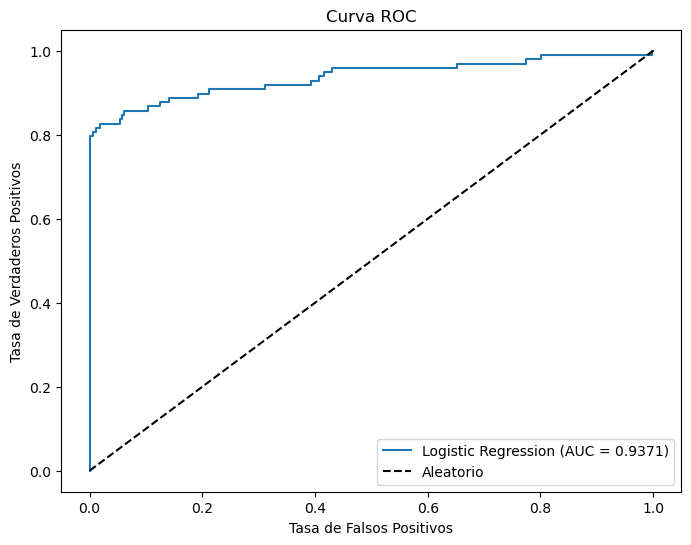

--- MÉTRICAS CON ENTRENAMIENTO: ---

----- Logistic Regression -----
Accuracy: 0.9994
Confusion Matrix:
[[117053      1]
 [    66    328]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    117054
           1       1.00      0.83      0.91       394

    accuracy                           1.00    117448
   macro avg       1.00      0.92      0.95    117448
weighted avg       1.00      1.00      1.00    117448


----- Decision Tree -----
Accuracy: 0.9991
Confusion Matrix:
[[29254    11]
 [   14    84]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     29265
           1       0.88      0.86      0.87        98

    accuracy                           1.00     29363
   macro avg       0.94      0.93      0.94     29363
weighted avg       1.00      1.00      1.00     29363

ROC-AUC: 0.9284


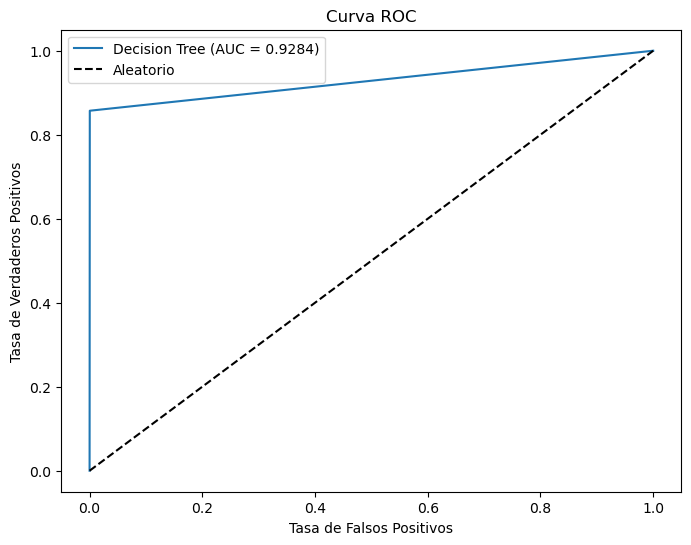

--- MÉTRICAS CON ENTRENAMIENTO: ---

----- Decision Tree -----
Accuracy: 1.0000
Confusion Matrix:
[[117054      0]
 [     0    394]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    117054
           1       1.00      1.00      1.00       394

    accuracy                           1.00    117448
   macro avg       1.00      1.00      1.00    117448
weighted avg       1.00      1.00      1.00    117448


----- Random Forest -----
Accuracy: 0.9996
Confusion Matrix:
[[29265     0]
 [   11    87]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     29265
           1       1.00      0.89      0.94        98

    accuracy                           1.00     29363
   macro avg       1.00      0.94      0.97     29363
weighted avg       1.00      1.00      1.00     29363

ROC-AUC: 0.9736


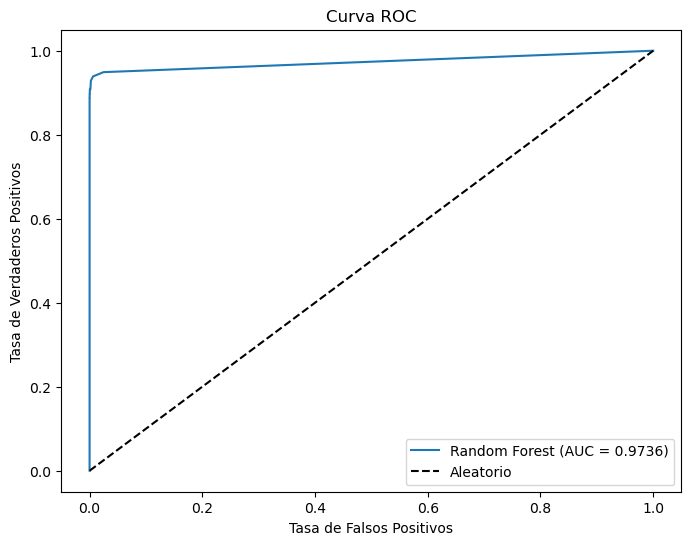

--- MÉTRICAS CON ENTRENAMIENTO: ---

----- Random Forest -----
Accuracy: 1.0000
Confusion Matrix:
[[117054      0]
 [     0    394]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    117054
           1       1.00      1.00      1.00       394

    accuracy                           1.00    117448
   macro avg       1.00      1.00      1.00    117448
weighted avg       1.00      1.00      1.00    117448


----- SVM -----
Accuracy: 0.9967
Confusion Matrix:
[[29265     0]
 [   98     0]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     29265
           1       0.00      0.00      0.00        98

    accuracy                           1.00     29363
   macro avg       0.50      0.50      0.50     29363
weighted avg       0.99      1.00      0.99     29363



c:\Users\Victor Casas\.conda\envs\pml\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Victor Casas\.conda\envs\pml\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Victor Casas\.conda\envs\pml\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c

ROC-AUC: 0.6616


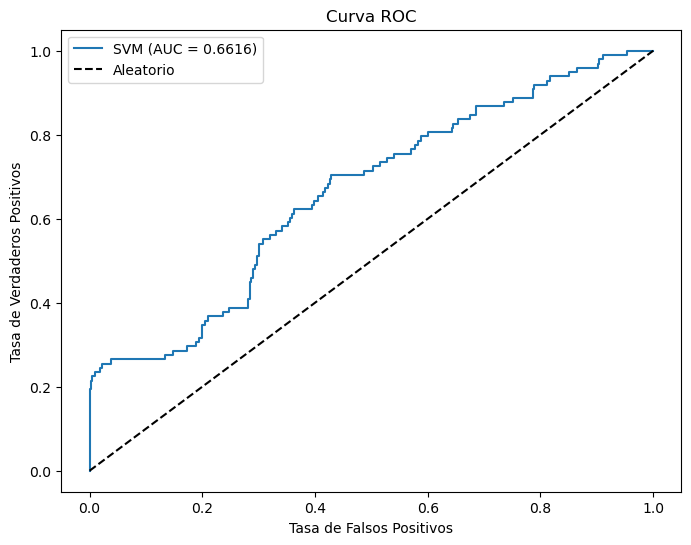

--- MÉTRICAS CON ENTRENAMIENTO: ---

----- SVM -----
Accuracy: 0.9966
Confusion Matrix:
[[117054      0]
 [   394      0]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    117054
           1       0.00      0.00      0.00       394

    accuracy                           1.00    117448
   macro avg       0.50      0.50      0.50    117448
weighted avg       0.99      1.00      0.99    117448



c:\Users\Victor Casas\.conda\envs\pml\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Victor Casas\.conda\envs\pml\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Victor Casas\.conda\envs\pml\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c


----- Xgboost -----
Accuracy: 0.9993
Confusion Matrix:
[[29265     0]
 [   20    78]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     29265
           1       1.00      0.80      0.89        98

    accuracy                           1.00     29363
   macro avg       1.00      0.90      0.94     29363
weighted avg       1.00      1.00      1.00     29363

ROC-AUC: 0.9859


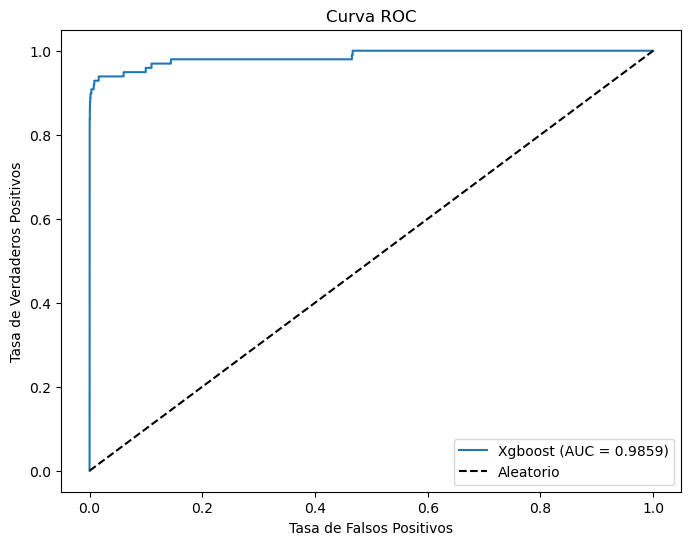

--- MÉTRICAS CON ENTRENAMIENTO: ---

----- Xgboost -----
Accuracy: 1.0000
Confusion Matrix:
[[117054      0]
 [     0    394]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    117054
           1       1.00      1.00      1.00       394

    accuracy                           1.00    117448
   macro avg       1.00      1.00      1.00    117448
weighted avg       1.00      1.00      1.00    117448



In [32]:
from xgboost import XGBClassifier
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(probability=True),  # probability=True para poder obtener ROC-AUC
    "Xgboost": XGBClassifier()
}

# Evaluar modelos
metrics_summary = evaluate_models(models, X_train, X_test, y_train, y_test)

In [33]:
metrics_summary.reset_index(drop=True)

,Model,Accuracy_train,Accuracy,Precision_train,Precision,Recall_train,Recall,F1-Score_train,F1-Score,ROC-AUC
0,Logistic Regression,0.999430,0.999285,0.99696,0.987342,0.832487,0.795918,0.907331,0.881356,0.937121
1,Decision Tree,1.000000,0.999149,1.00000,0.884211,1.000000,0.857143,1.000000,0.870466,0.928383
2,Random Forest,1.000000,0.999625,1.00000,1.000000,1.000000,0.887755,1.000000,0.940541,0.973617
3,SVM,0.996645,0.996662,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.661638
4,Xgboost,1.000000,0.999319,1.00000,1.000000,1.000000,0.795918,1.000000,0.886364,0.985852


- Observamos que algunos modelos tienen un overfitting claro por lo que los descartaremos, aun asi vamos a probar con una tecnica de oversampling para que los datos esten mas balanceados a ver si podemos obtener unos mejores resultados

In [34]:
print(f"Distribución antes de SMOTE: {y_train.value_counts()}")

Distribución antes de SMOTE: Class
0    117054
1       394
Name: count, dtype: int64


In [17]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X_train, y_train)
print(f"Distribución después de SMOTE: {y_res.value_counts()}")

Distribución después de SMOTE: Class
0    117054
1    117054
Name: count, dtype: int64


In [15]:
def classification_metrics(y_test, y_pred, name, model=np.nan, roc_bool=True):
    """
    Calcula y muestra diversas métricas de clasificación tras realizar una predicción.

    Parámetros:
    -----------
    y_test : array-like
        Valores verdaderos de la variable objetivo (labels) del conjunto de test.
    y_pred : array-like
        Valores predichos por el modelo.
    name : str
        Nombre o descripción del modelo, utilizado para etiquetar la salida.
    model : object, optional
        Modelo utilizado para hacer la predicción. Se utiliza para calcular la métrica
        ROC-AUC si el modelo soporta la función `predict_proba()`. Por defecto, es np.NaN.
    roc_bool : bool, optional
        Variable para pintar (o no) la curva ROC-AUC.

    Métricas calculadas:
    --------------------
    - Accuracy: Precisión del modelo.
    - Matriz de confusión: Representación de los aciertos y errores del modelo.
    - Reporte de clasificación: Incluye precisión, recall, F1-score, etc.
    - ROC-AUC: Se calcula solo si el modelo soporta `predict_proba()`.
    
    Devuelve:
    ---------
    data_metrics : pd.DataFrame
        Dataframe con la información de métricas del modelo evaluado en la función.
    """
    
    # Calcular la precisión (accuracy)
    accuracy = accuracy_score(y_test, y_pred)
    
    # Mostrar resultados
    print(f"\n----- {name} -----")
    print(f"Accuracy: {accuracy:.4f}")
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    metrics_summary = {'Model': [], 'Accuracy': [], 'Precision': [], 'Recall': [], 'F1-Score': [], 'ROC-AUC': []}

    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    # Calcular y mostrar ROC-AUC si el modelo lo permite y se pide
    if roc_bool:
        if hasattr(model, "predict_proba"):
            y_proba = model.predict_proba(X_test)[:,1]
            roc_auc = roc_auc_score(y_test, y_proba)
            fpr, tpr, _ = roc_curve(y_test, y_proba)
            print(f"ROC-AUC: {roc_auc:.4f}")
            
            plt.figure(figsize=(8, 6))
            plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.4f})')
            plt.plot([0, 1], [0, 1], 'k--', label='Aleatorio')
            plt.xlabel('Tasa de Falsos Positivos')
            plt.ylabel('Tasa de Verdaderos Positivos')
            plt.title('Curva ROC')
            plt.legend()
            plt.show()
        
        else:
            print(f"ROC-AUC: No disponible para {name}")

     # Almacenar los resultados en el diccionario
    metrics_summary['Model'].append(name)
    metrics_summary['Accuracy'].append(accuracy)
    metrics_summary['Precision'].append(precision)
    metrics_summary['Recall'].append(recall)
    metrics_summary['F1-Score'].append(f1)
    if roc_bool == True & hasattr(model, "predict_proba"):
        metrics_summary['ROC-AUC'].append(roc_auc)
    else:
        metrics_summary['ROC-AUC'].append(np.nan)
    
    return pd.DataFrame(metrics_summary)

# Función para entrenar y evaluar modelos
def evaluate_models(models, X_res, X_test, y_res, y_test):
    """
    Entrena y evalúa múltiples modelos de clasificación en un conjunto de datos de prueba.

    Parámetros:
    -----------
    models : dict
        Un diccionario donde las claves son los nombres de los modelos (como cadenas de texto) 
        y los valores son instancias de los modelos de clasificación.
    X_res : array-like
        Características (features) del conjunto de entrenamiento.
    X_test : array-like
        Características (features) del conjunto de prueba.
    y_res : array-like
        Valores verdaderos de la variable objetivo (labels) del conjunto de entrenamiento.
    y_test : array-like
        Valores verdaderos de la variable objetivo (labels) del conjunto de prueba.

    Funcionalidad:
    --------------
    - Entrena cada modelo en `models` usando el conjunto de entrenamiento `X_train` y `y_train`.
    - Predice los valores de la variable objetivo en `X_test` para cada modelo.
    - Calcula y muestra métricas de clasificación (incluyendo accuracy, matriz de confusión, 
      reporte de clasificación y ROC-AUC si está disponible) utilizando la función 
      `classification_metrics`.

    Devuelve:
    ---------
    data_metrics : pd.DataFrame
        Dataframe con la información de métricas de cada modelo evaluado en la función.
    """

    data_metrics2 = pd.DataFrame()
    
    # Iterar sobre todos los modelos definidos
    for name, model in models.items():
       
        # Entrenar el modelo
        model.fit(X_res, y_res)
        
        # Predecir en los datos de prueba
        y_pred = model.predict(X_test)

        # Sacar métricas
        df_met_model = classification_metrics(y_test, y_pred, name, model)

        # Métricas training
        print("--- MÉTRICAS CON ENTRENAMIENTO: ---")
        df_met_model_train = classification_metrics(y_res, model.predict(X_res), name, model, roc_bool=False)

        # Renombrar columnas de df_met_model_train para concatenar
        df_met_model_train = df_met_model_train.drop(columns=["ROC-AUC"])
        df_met_model_train.rename(columns={col: col + '_train' for col in df_met_model_train.columns if col != 'Model'}, inplace=True)
        
        # Juntar los dos dataframes en uno
        df_met_model = df_met_model.merge(df_met_model_train, left_on='Model', right_on='Model')
        
        if data_metrics2.shape[0] > 0:
            data_metrics2 = pd.concat([data_metrics2, df_met_model])
        else:
            data_metrics2 = df_met_model

    return data_metrics2.reset_index(drop=True).loc[:, ['Model', 'Accuracy_train', 'Accuracy', 'Precision_train', 'Precision', 'Recall_train', 'Recall', 'F1-Score_train', 'F1-Score', 'ROC-AUC']]

c:\Users\Victor Casas\.conda\envs\pml\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



----- Logistic Regression -----
Accuracy: 0.9784
Confusion Matrix:
[[28645   620]
 [   15    83]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     29265
           1       0.12      0.85      0.21        98

    accuracy                           0.98     29363
   macro avg       0.56      0.91      0.60     29363
weighted avg       1.00      0.98      0.99     29363

ROC-AUC: 0.9403


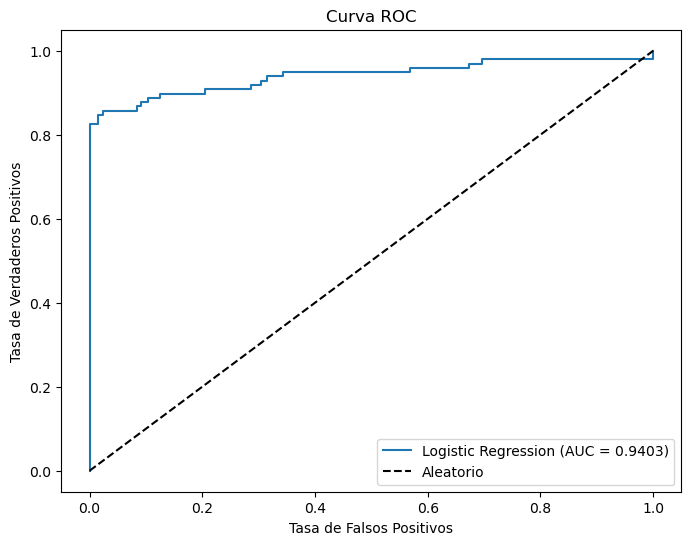

--- MÉTRICAS CON ENTRENAMIENTO: ---

----- Logistic Regression -----
Accuracy: 0.9637
Confusion Matrix:
[[114610   2444]
 [  6043 111011]]
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.98      0.96    117054
           1       0.98      0.95      0.96    117054

    accuracy                           0.96    234108
   macro avg       0.96      0.96      0.96    234108
weighted avg       0.96      0.96      0.96    234108


----- Decision Tree -----
Accuracy: 0.9955
Confusion Matrix:
[[29147   118]
 [   13    85]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     29265
           1       0.42      0.87      0.56        98

    accuracy                           1.00     29363
   macro avg       0.71      0.93      0.78     29363
weighted avg       1.00      1.00      1.00     29363

ROC-AUC: 0.9317


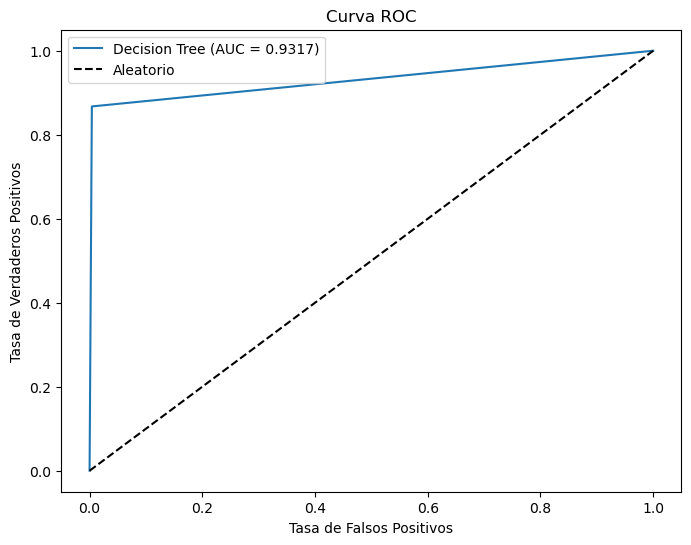

--- MÉTRICAS CON ENTRENAMIENTO: ---

----- Decision Tree -----
Accuracy: 1.0000
Confusion Matrix:
[[117054      0]
 [     0 117054]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    117054
           1       1.00      1.00      1.00    117054

    accuracy                           1.00    234108
   macro avg       1.00      1.00      1.00    234108
weighted avg       1.00      1.00      1.00    234108


----- Random Forest -----
Accuracy: 0.9995
Confusion Matrix:
[[29263     2]
 [   13    85]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     29265
           1       0.98      0.87      0.92        98

    accuracy                           1.00     29363
   macro avg       0.99      0.93      0.96     29363
weighted avg       1.00      1.00      1.00     29363

ROC-AUC: 0.9889


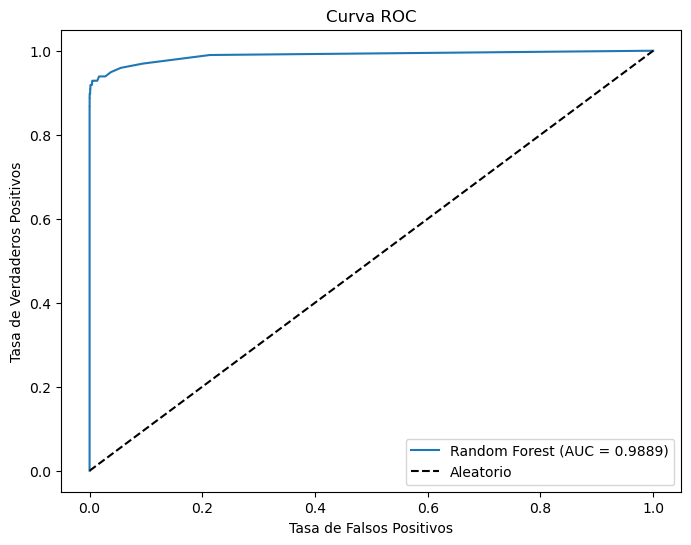

--- MÉTRICAS CON ENTRENAMIENTO: ---

----- Random Forest -----
Accuracy: 1.0000
Confusion Matrix:
[[117054      0]
 [     0 117054]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    117054
           1       1.00      1.00      1.00    117054

    accuracy                           1.00    234108
   macro avg       1.00      1.00      1.00    234108
weighted avg       1.00      1.00      1.00    234108



In [ ]:
from xgboost import XGBClassifier
models2 = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(probability=True),  # probability=True para poder obtener ROC-AUC
    "Xgboost": XGBClassifier()
}

# Evaluar modelos
metrics_summary2 = evaluate_models(models2 , X_res, X_test, y_res, y_test)

In [ ]:
metrics_summary.reset_index(drop=True)

In [ ]:
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Versión optimizada con hiperparámetros
models_tuned = {
    'Logistic Regression': LogisticRegression(
        penalty='l2',
        C=0.1,
        class_weight='balanced',  # Critical for imbalanced data
        solver='liblinear',
        max_iter=1000
    ),
    'Decision Tree': DecisionTreeClassifier(
        max_depth=5,            # Limitar profundidad
        min_samples_split=10,    # Evitar splits con pocas muestras
        class_weight='balanced'
    ),
    'Random Forest': RandomForestClassifier(
        n_estimators=150,
        max_depth=7,
        min_samples_leaf=5,
        class_weight='balanced_subsample',  # Balanceo por bootstrap
        n_jobs=-1
    ),
    'SVM': SVC(
        C=0.5,
        kernel='rbf',
        gamma='scale',
        probability=True,
        class_weight='balanced'
    ),
    'XGBoost': XGBClassifier(
        n_estimators=200,
        max_depth=4,
        learning_rate=0.05,
        subsample=0.8,
        colsample_bytree=0.8,
        scale_pos_weight=len(y_res[y_res==0])/len(y_res[y_res==1]),  # Balanceo manual
        eval_metric='aucpr'  # Métrica óptima para fraudes
    )
}

# Re-evaluar (usando la misma función evaluate_models)
metrics_summary_tuned = evaluate_models(models_tuned, X_res, X_test, y_res, y_test)